In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline
sns.set()

In [ ]:
# Quick Function to check for missing Values
def  Missing_Inspection(x):
    return pd.Series([x.count(),x.isnull().sum()],index = ['N',"NMISS"])

#UDF to Create Numerical Data Audit Report
def  num_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index = ['N',"NMISS","SUM",'MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])

# UDF to create categorical data audit report
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()], index=['N','NMISS','ColumnsName'])

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
stores =pd.read_csv("/content/stores.csv")
features = pd.read_csv("/content/features.csv")

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
#Merging train,stores and features dataset
train_df = pd.merge(train,stores)
train = pd.merge(train_df,features, on = ["Store","Date","IsHoliday"])
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
#Merging test,stores and features dataset
test_df = pd.merge(test,stores)
test = pd.merge(test_df,features, on = ["Store","Date","IsHoliday"])
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [ ]:
####Splitting the numerical and categorical data from train 

In [ ]:
#Train Numerical data
train_num = train.select_dtypes(include = ["float64","float32","int32","int64"])

#train Categorical data
train_cat = train.select_dtypes(include = ["object","O"])

In [ ]:
print("Train Num",train_num.columns.to_list())
print("\n","Train Cat",train_cat.columns.to_list())

Train Num ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

 Train Cat ['Date', 'Type']


In [ ]:
writer = pd.ExcelWriter('Retail_store sales.xlsx')

In [ ]:
#Numerical summary for Train data set
num_summary = train_num.apply(num_var_summary).T
num_summary.to_excel(writer,"num_var_summ_train",index=True)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [ ]:
#Train categorical summary
cat_summary_train =  train_cat.apply(cat_summary).T
cat_summary_train.to_excel(writer,'cat_summ_train', index=True)
cat_summary_train

,N,NMISS,ColumnsName
Date,421570,0,2011-12-23 3027 2011-11-25 3021 2011-12-...
Type,421570,0,A 215478 B 163495 C 42597 Name: Type...


In [ ]:
#Splitting Categorical and Numerical data for test dataset

In [ ]:
###Test Numerical Data
test_num=test.select_dtypes(include=['float64', 'float32','int32','int64'])

###Test Categorical Data
test_cat = test.select_dtypes(include=['object', 'O'])

In [ ]:
num_summary_test = test_num.apply(num_var_summary).T
num_summary_test.to_excel(writer,'num_var_summ_test',index=True)
num_summary_test

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,39690.0000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,-2781.450000,20.840000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,-35.740000,0.020000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,-179.260000,0.150000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,0.220000,2.610000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000


In [ ]:
#Key Observations:
#MarkDown 5 is highly skewed

#MarkDown 1 and 4 are highly correlated

In [ ]:
#Correlation
train_corr = pd.DataFrame(train.corr())
train_corr.to_excel(writer,'train_data_corr',index = True)
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


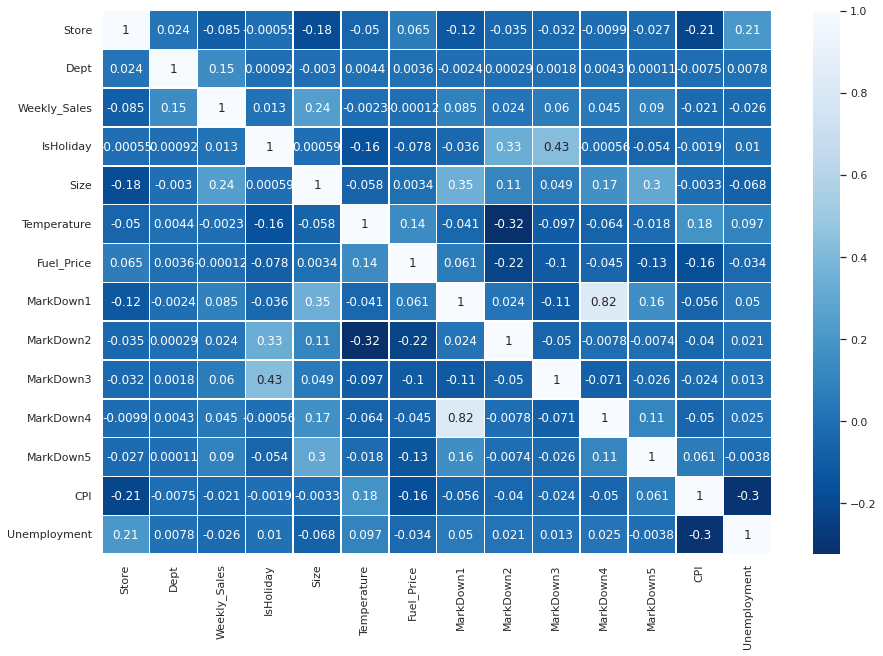

In [ ]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.0)
sns.heatmap(train.corr(),linewidths=0.5,annot=True,cmap='Blues_r')

In [ ]:
test_corr = pd.DataFrame(test.corr())
test_corr.to_excel(writer,'test_data_corr',index = True)
test_corr

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


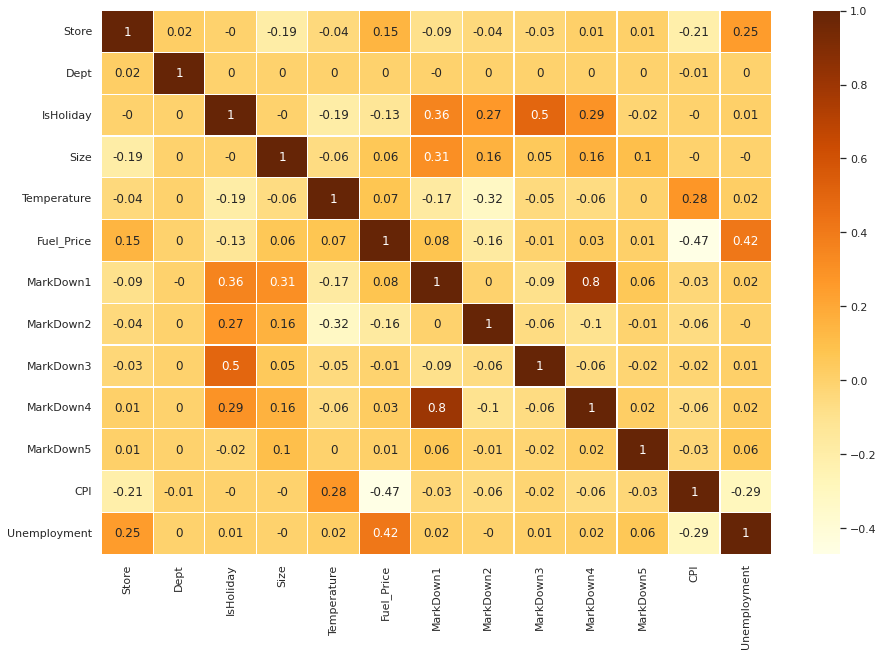

In [ ]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.0)
sns.heatmap((test.corr()).round(2),linewidths=0.25,annot=True,cmap='YlOrBr')

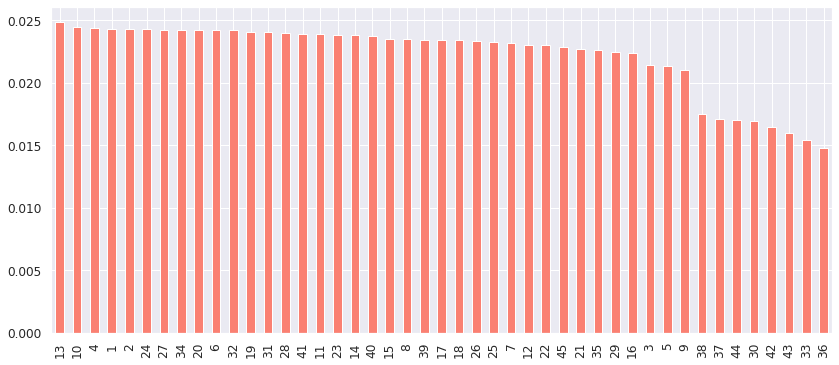

In [ ]:
#Data Analysis
sns.set(rc={'figure.figsize':(14,6)}, palette="dark:salmon_r", font_scale=1.1)
train['Store'].value_counts(normalize=True).plot(kind = 'bar')

**Here graph shows that store 13 has higher value,store 36 has lesser value**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


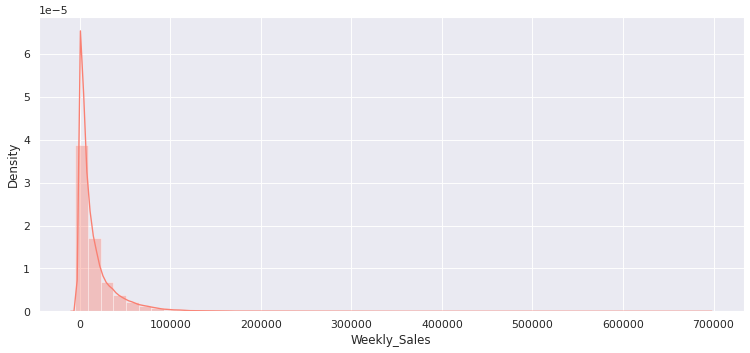

In [ ]:
#Weekly Sales Distribution
plt.figure(dpi=65)
sns.distplot(train.Weekly_Sales)


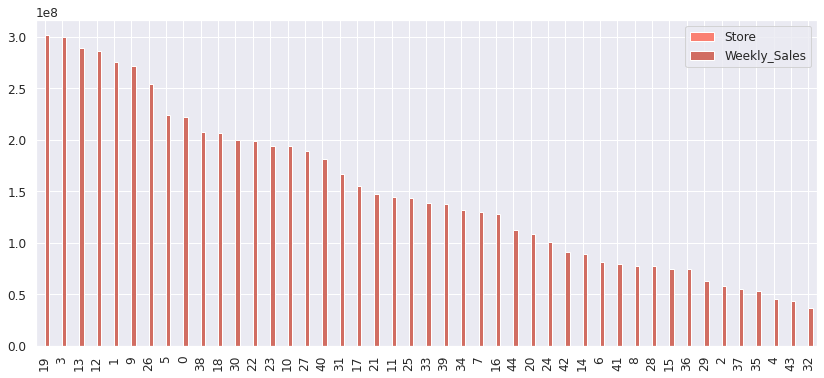

In [ ]:
train.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')

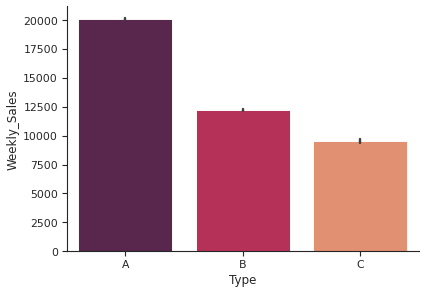

In [ ]:
#Sales by type
plt.figure(figsize=(7,5),dpi=65)
sns.set_style('ticks')
sns.barplot(y=train["Weekly_Sales"],x=train["Type"],palette='rocket')
sns.despine()

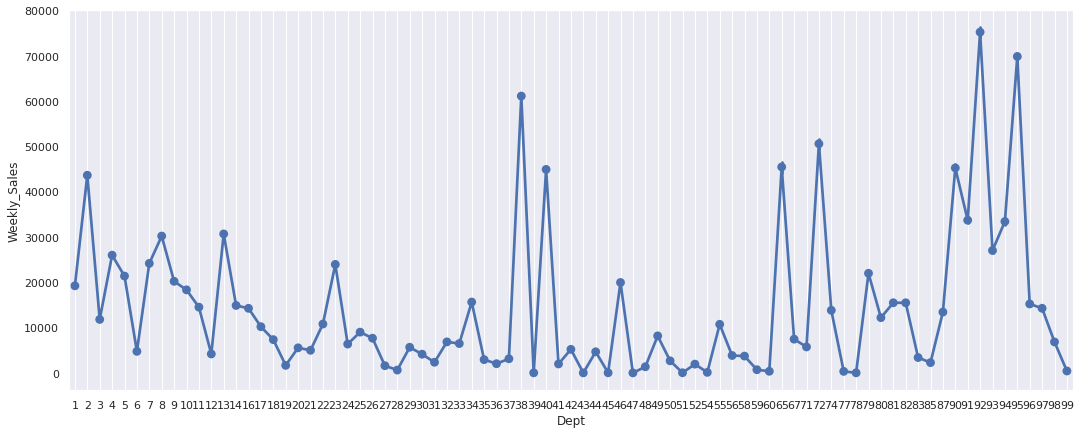

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,7)})
sns.pointplot(x='Dept', y='Weekly_Sales',data=train)
plt.grid()

**Department wise highest value is 92**

In [ ]:
#missing value inspection
train.apply(Missing_Inspection).T

,N,NMISS
Store,421570,0
Dept,421570,0
Date,421570,0
Weekly_Sales,421570,0
IsHoliday,421570,0
Type,421570,0
Size,421570,0
Temperature,421570,0
Fuel_Price,421570,0
MarkDown1,150681,270889


In [ ]:
test.apply(Missing_Inspection).T

,N,NMISS
Store,115064,0
Dept,115064,0
Date,115064,0
IsHoliday,115064,0
Type,115064,0
Size,115064,0
Temperature,115064,0
Fuel_Price,115064,0
MarkDown1,114915,149
MarkDown2,86437,28627


In [ ]:
#Inspecting the negative values

In [ ]:
print(train_num.apply(num_var_summary).T['MIN']<0)
print('\n','.><.'*7)
print(test_num.apply(num_var_summary).T['MIN']<0)

Store           False
Dept            False
Weekly_Sales     True
Size            False
Temperature      True
Fuel_Price      False
MarkDown1       False
MarkDown2        True
MarkDown3        True
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Name: MIN, dtype: bool

 .><..><..><..><..><..><..><.
Store           False
Dept            False
Size            False
Temperature      True
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4       False
MarkDown5        True
CPI             False
Unemployment    False
Name: MIN, dtype: bool


In [ ]:
#Cleaning the negative value in train dataset
train.loc[train['Weekly_Sales'] < 0 ,'Weekly_Sales'] = 0
train.loc[train['MarkDown2'] < 0 ,'MarkDown2'] = 0
train.loc[train['MarkDown3'] < 0, 'MarkDown3'] = 0

In [ ]:
#Cleaning the negative value in test dataset
test.loc[test['MarkDown1'] < 0 ,'MarkDown1']= 0
test.loc[test['MarkDown2'] < 0, 'MarkDown2'] = 0
test.loc[test['MarkDown3'] < 0 ,'MarkDown3']= 0
test.loc[test['MarkDown5'] < 0 ,'MarkDown5']= 0

In [ ]:
#Missing Value treatment for "test" Other than Markdowns
test['CPI'] = test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment'] = test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#Now we can Fill NAN Markdowns with 0
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
train.apply(Missing_Inspection).T

,N,NMISS
Store,421570,0
Dept,421570,0
Date,421570,0
Weekly_Sales,421570,0
IsHoliday,421570,0
Type,421570,0
Size,421570,0
Temperature,421570,0
Fuel_Price,421570,0
MarkDown1,421570,0


In [ ]:
test.apply(Missing_Inspection).T

,N,NMISS
Store,115064,0
Dept,115064,0
Date,115064,0
IsHoliday,115064,0
Type,115064,0
Size,115064,0
Temperature,115064,0
Fuel_Price,115064,0
MarkDown1,115064,0
MarkDown2,115064,0


In [ ]:
train["Date"].dtype

dtype('O')

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
# Extracting date features
train["Date"]=pd.to_datetime(train["Date"])
train["Day"]=train['Date'].dt.day
train["Week"]=train['Date'].dt.week
train["Month"]=train['Date'].dt.month
train["Year"]=train['Date'].dt.year

test["Day"]=test['Date'].dt.day
test["Week"]=test['Date'].dt.week
test["Month"]=test['Date'].dt.month
test["Year"]=test['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [ ]:
#SUPERBOWL DATES
s_1=np.datetime64('2010-02-12')
s_2=np.datetime64('2011-02-11')
s_3=np.datetime64('2012-02-10')
s_4=np.datetime64('2013-02-08')

#labor day
l_1=np.datetime64('2010-09-10')
l_2=np.datetime64('2011-09-09')
l_3=np.datetime64('2012-09-07')
l_4=np.datetime64('2013-09-06')

#thanksgiving
t_1=np.datetime64('2010-11-26')
t_2=np.datetime64('2011-11-25')
t_3=np.datetime64('2012-11-23')
t_4=np.datetime64('2013-11-29')

#christams day
c_1=np.datetime64('2010-12-31')
c_2=np.datetime64('2011-12-30')
c_3=np.datetime64('2012-12-28')
c_4=np.datetime64('2013-12-27')

In [ ]:
#Creating new variables on train data

train['Superbowl']=np.where(((train.Date==s_1) | (train.Date==s_2) |
                                  (train.Date==s_3) | (train.Date==s_4)),1,0)

train['labor']= np.where(((train.Date==l_1) | (train.Date==l_2) |
                                  (train.Date==l_3) | (train.Date==l_4)),1,0)

train['thanksgiving']=np.where(((train.Date==t_1) | (train.Date==t_2) |
                                  (train.Date==t_3) | (train.Date==t_4)),1,0)

train['christmas']=np.where(((train.Date==c_1) | (train.Date==c_2) |
                             (train.Date==c_3) | (train.Date==c_4)),1,0)

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0


In [ ]:
#Creating new variables on test data
test['Superbowl']=np.where(((test.Date==s_1) | (test.Date==s_2) |
                                  (test.Date==s_3) | (test.Date==s_4)),1,0)

test['labor']= np.where(((test.Date==l_1) | (test.Date==l_2) |
                                  (test.Date==l_3) | (test.Date==l_4)),1,0)

test['thanksgiving']=np.where(((test.Date==t_1) | (test.Date==t_2) |
                                  (test.Date==t_3) | (test.Date==t_4)),1,0)

test['christmas']=np.where(((test.Date==c_1) | (test.Date==c_2) |
                             (test.Date==c_3) | (test.Date==c_4)),1,0)

test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


In [ ]:
#converting IsHoliday variables from true/false to 1/0 on train data
train['IsHoliday']=np.where((train.IsHoliday==True),1,0)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0


In [ ]:
#converting IsHoliday variables from true/false to 1/0 on test data
test['IsHoliday']=np.where((test.IsHoliday==True),1,0)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


In [ ]:
#Changing the values of Isholiday Columns according to special holidays
train['IsHoliday']=train['IsHoliday']|train['Superbowl']|train['labor']|train['thanksgiving']|train['christmas']
test['IsHoliday']=test['IsHoliday']|test['Superbowl']|test['labor']|test['thanksgiving']|test['christmas']

In [ ]:
#Dropping the extra columns
droplist=['Superbowl', 'labor', 'thanksgiving', 'christmas']
train.drop(droplist,inplace=True,axis=1)
test.drop(droplist,inplace=True,axis=1)

In [ ]:
train=pd.get_dummies(train, drop_first=True)
test=pd.get_dummies(test,drop_first=True)

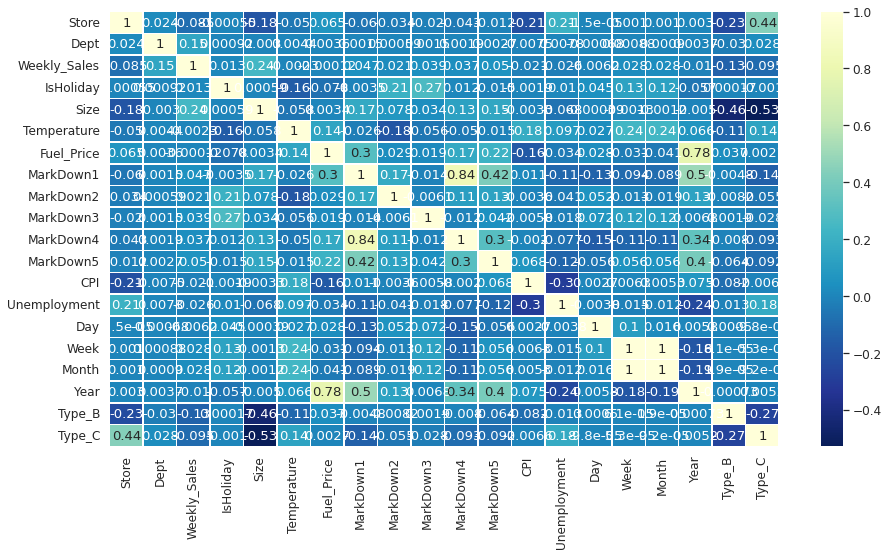

In [ ]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.1)
sns.heatmap(train.corr(),linewidths=0.5,annot=True,cmap='YlGnBu_r')

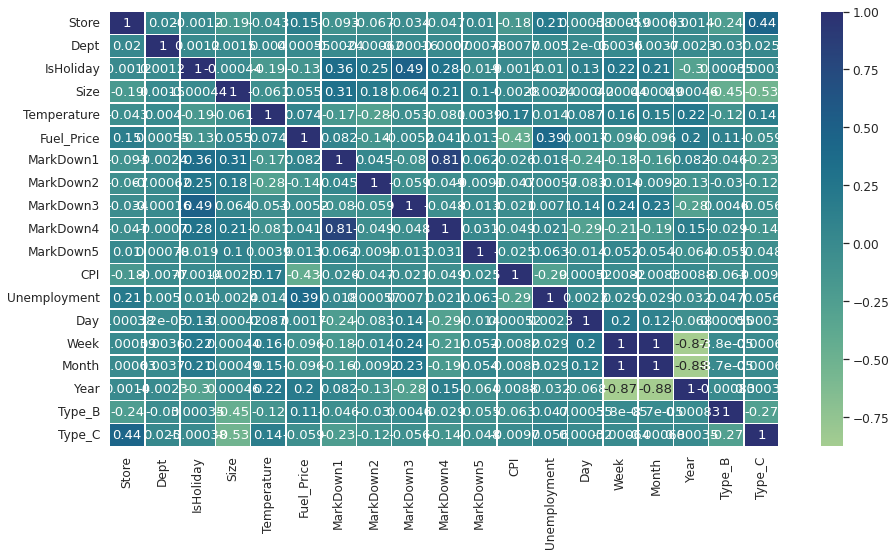

In [ ]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.1)
sns.heatmap(test.corr(),linewidths=0.5,annot=True,cmap='crest')

In [ ]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month',
       'Year', 'Type_B', 'Type_C'],
      dtype='object')

In [ ]:
dropcolumn=['MarkDown1', 'MarkDown5', 'Year' , 'Day', 'Month' , 'CPI', 'Unemployment'] 
train.drop(dropcolumn,inplace=True,axis=1)
test.drop(dropcolumn,inplace=True,axis=1)

In [ ]:
#Converting all float var int -> integer.
#For train 
for var in train:
    if train[var].dtypes == float:
        train[var]=train[var].astype(int)

#For test
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)        

In [ ]:
#Defining training and testing dataset
#Every values except 'Weekly_Sales' and 'Date' 
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

In [ ]:
#Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()


In [ ]:
#Shape of datasets
train_X.shape, train_y.shape, test_X.shape

((421570, 12), (421570,), (115064, 12))

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from sklearn import linear_model
l_model = LinearRegression(n_jobs=-1)
l_model.fit(train_X,train_y)

LinearRegression(n_jobs=-1)

In [ ]:
y_pred =l_model.predict(test_X)
acc_l_model = round(l_model.score(train_X,train_y)* 100,2)
print('Accuracy of Linear Regression model: ' +str(acc_l_model)+'%')

Accuracy of Linear Regression model: 8.86%


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [ ]:
clf_rf = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
clf_rf.fit(train_X,train_y)
y_pred_rf = clf_rf.predict(test_X)
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.9s


building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.3s


Accuracy of Random Forest model: 99.64%


[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    3.5s finished


** Decision tree** **

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(train_X,train_y)
y_pred_dt = reg.predict(test_X)
acc_dt = round(reg.score(train_X,train_y)*100,2)
print("Accuracy of Decision Tree Model: "+str(acc_dt)+'%')

Accuracy of Decision Tree Model: 100.0%


In [ ]:
#Let's compare the accuracy of all models Linear regression,Random forest and Decision tree
models = pd.DataFrame({'Model':['Linear Regression','Random Forest','Decision Tree'],
                      'Score':[acc_l_model,acc_rf,acc_dt]})
models.sort_values(by='Score',ascending= False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.64
0,Linear Regression,8.86


In [ ]:
#Predicting Weekly Sales value for test data based on DT and RF
Result = pd.DataFrame({
    'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
    'Weekly_Sales_dt': y_pred_dt , 'Weekly_sales_rf' : y_pred_rf})
Result.to_csv('weekly_sales Predicted.csv',index=False)

In [ ]:
Result.head()

,Store_Dept_Date,Weekly_Sales_dt,Weekly_sales_rf
0,1_1_2012-11-02,39886.0,32220.189189
1,1_2_2012-11-02,47313.0,47532.891892
2,1_3_2012-11-02,10803.0,10681.864865
3,1_4_2012-11-02,36826.0,39227.081081
4,1_5_2012-11-02,31002.0,29764.054054
